In [1]:
import pandas as pd
from pathlib import Path

flowers = 'D:/!!!KULIAH/!!!SKRIPSI/dataset/copi'
img_directory = Path(flowers)

filepaths = list(img_directory.rglob('*'))
filepaths = [fp for fp in filepaths if fp.suffix.lower() in ['.jpg', '.png']]

image_names = [fp.name for fp in filepaths]
labels = [fp.parent.name for fp in filepaths]

df = pd.DataFrame({
    'image': image_names,
    'label': labels
})
print(df)

                             image             label
0     10194496745_4b401380d8_c.jpg  black_eyed_susan
1     10236843845_a33efbcdc1_c.jpg  black_eyed_susan
2     10312753826_36d258a89f_c.jpg  black_eyed_susan
3      1050438482_9f2ade4447_c.jpg  black_eyed_susan
4      1052955587_cb7fe390cf_c.jpg  black_eyed_susan
...                            ...               ...
4095   IMG_20250305_095351_602.jpg         sunflower
4096   IMG_20250305_095357_360.jpg         sunflower
4097   IMG_20250305_095409_275.jpg         sunflower
4098   IMG_20250305_095413_216.jpg         sunflower
4099   IMG_20250305_095416_781.jpg         sunflower

[4100 rows x 2 columns]


['black_eyed_susan', 'calendula', 'common_daisy', 'coreopsis', 'sunflower']
Total Files: 4100


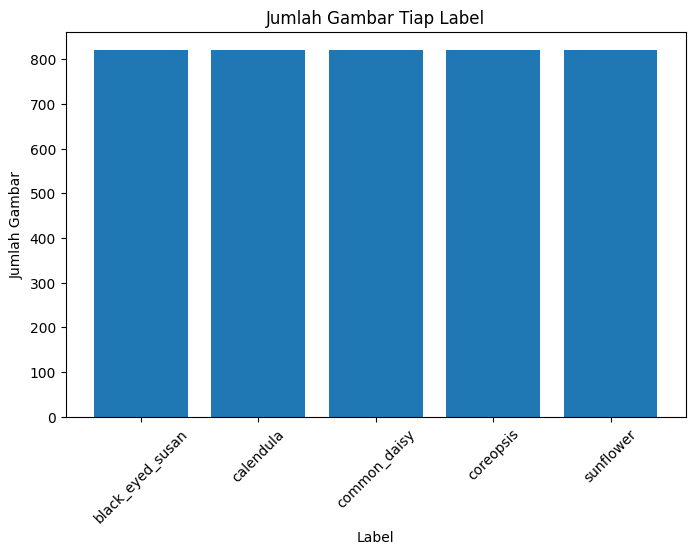

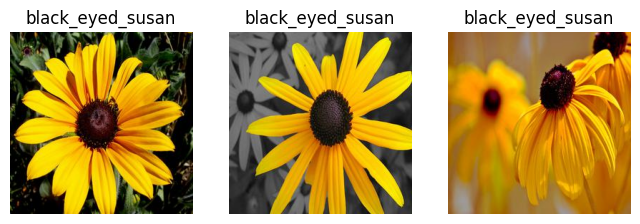

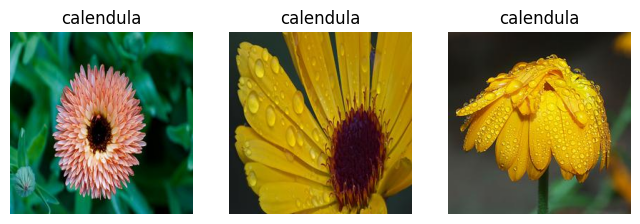

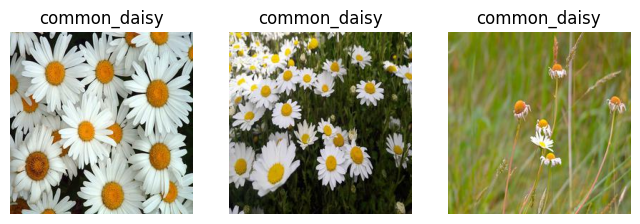

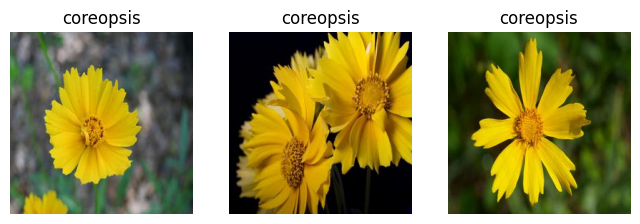

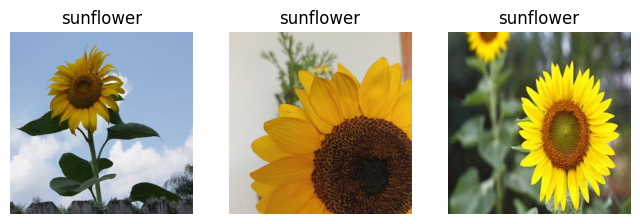

In [2]:
import os              
import numpy as np      
import matplotlib.pyplot as plt 
dataset = 'D:/!!!KULIAH/!!!SKRIPSI/dataset/copi'
print(os.listdir(dataset))

number_label = {}
total_files = 0

for i in os.listdir(dataset):
    folder_path = os.path.join(dataset, i)
    if os.path.isdir(folder_path):
        counting = len(os.listdir(folder_path))
        number_label[i] = counting
        total_files += counting

print("Total Files:", total_files)

plt.figure(figsize=(8, 5))
plt.bar(number_label.keys(), number_label.values())
plt.title("Jumlah Gambar Tiap Label")
plt.xlabel('Label')
plt.ylabel('Jumlah Gambar')
plt.xticks(rotation=45)
plt.show()

def load_random_imgs_from_folder(folder, label):
    plt.figure(figsize=(8, 5))
    for i in range(3):
        file = np.random.choice(os.listdir(folder))
        image_path = os.path.join(folder, file)
        img = plt.imread(image_path)
        ax = plt.subplot(1, 3, i + 1)
        ax.axis("off")
        ax.title.set_text(label)
        plt.imshow(img)
    plt.show()

classes = [folder for folder in os.listdir(dataset) if os.path.isdir(os.path.join(dataset, folder))]
data_dir = dataset 

for label in classes:
    load_random_imgs_from_folder(os.path.join(data_dir, label), label)

In [4]:
import os
from PIL import Image

input_dir = 'D:/!!!KULIAH/!!!SKRIPSI/dataset/primer'
output_dir = 'D:/!!!KULIAH/!!!SKRIPSI/code/2'

IMG_SIZE = (299, 299)

os.makedirs(output_dir, exist_ok=True)

for label in os.listdir(input_dir):
    label_path = os.path.join(input_dir, label)

    if os.path.isdir(label_path):
        output_label_dir = os.path.join(output_dir, label)
        os.makedirs(output_label_dir, exist_ok=True)

        images = [f for f in os.listdir(label_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

        for img_name in images:
            src_path = os.path.join(label_path, img_name)
            dst_path = os.path.join(output_label_dir, img_name)
            try:
                img = Image.open(src_path)
                img = img.resize(IMG_SIZE)
                img.save(dst_path)
            except Exception as e:
                print(f"Gagal memproses {img_name}: {e}")
        print(f"{label}: {len(images)} gambar berhasil diresize.")

black_eyed_susan: 50 gambar berhasil diresize.
calendula: 50 gambar berhasil diresize.
common_daisy: 50 gambar berhasil diresize.
coreopsis: 50 gambar berhasil diresize.
sunflower: 50 gambar berhasil diresize.


In [5]:
import os
import numpy as np
import h5py
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.models import Model

input_dir = r"D:/!!!KULIAH/!!!SKRIPSI/code/2"
target_size = (299, 299)
output_h5_path = "D:/!!!KULIAH/!!!SKRIPSI/code/2/features.h5"

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
model = Model(inputs=base_model.input, outputs=base_model.output)  

label_list = sorted([folder for folder in os.listdir(input_dir) if os.path.isdir(os.path.join(input_dir, folder))])
label_dict = {label: idx for idx, label in enumerate(label_list)}

total_images = sum(len([f for f in os.listdir(os.path.join(input_dir, lbl)) if f.endswith(('.jpg', '.png', '.jpeg'))]) for lbl in label_list)

with h5py.File(output_h5_path, 'w') as f:
    x_dataset = f.create_dataset("X", shape=(total_images, 8, 8, 2048), dtype='float32')
    y_dataset = f.create_dataset("y", shape=(total_images,), dtype='int')

    idx = 0
    for label in label_list:
        label_path = os.path.join(input_dir, label)
        for img_file in os.listdir(label_path):
            if not img_file.lower().endswith(('.jpg', '.png', '.jpeg')):
                continue

            try:
                img_path = os.path.join(label_path, img_file)
                img = load_img(img_path, target_size=target_size)
                x = img_to_array(img)
                x = np.expand_dims(x, axis=0)
                x = preprocess_input(x)

                features = model.predict(x) 
                x_dataset[idx] = features.squeeze()
                y_dataset[idx] = label_dict[label]

                idx += 1

            except Exception as e:
                print(f"Gagal memproses {img_file}: {e}")

    print(f"Fitur dari {idx} gambar berhasil disimpan ke '{output_h5_path}'")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [6]:
import tensorflow as tf
import h5py  # Untuk bekerja dengan file HDF5
import numpy as np
import os

PATCH_SIZE = 4
PROJECTION_DIM = 64
NUM_HEADS = 4
TRANSFORMER_LAYERS = 8
OUTPUT_FEATURE_DIM = 256

feature_path = "D:/!!!KULIAH/!!!SKRIPSI/code/2/features.h5"

with h5py.File(feature_path, 'r') as f:
    features = f['X'][:]  
    labels = f['y'][:]  

num_samples, H, W, C = features.shape  
assert H == W == 8 and C == 2048, "Dimensi fitur tidak sesuai dengan yang diharapkan!"

def extract_patches(features, patch_size): 
    batch_size, H, W, C = features.shape
    num_patches = (H // patch_size) * (W // patch_size)
    patches = tf.image.extract_patches(
        images=features,
        sizes=[1, patch_size, patch_size, 1],
        strides=[1, patch_size, patch_size, 1],
        rates=[1, 1, 1, 1],
        padding="VALID"
    )
    patches = tf.reshape(patches, [batch_size, num_patches, patch_size * patch_size * C])  
    return patches

class PatchEmbedding(tf.keras.layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.projection = tf.keras.layers.Dense(projection_dim)  
        self.position_embedding = tf.keras.layers.Embedding(input_dim=num_patches, output_dim=projection_dim)

    def call(self, patches):
        positions = tf.range(start=0, limit=patches.shape[1], delta=1)  
        embedded_patches = self.projection(patches) + self.position_embedding(positions)  
        return embedded_patches

def transformer_encoder(inputs, num_heads, projection_dim):
    x = tf.keras.layers.LayerNormalization()(inputs)
    x = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=projection_dim)(x, x)
    x = tf.keras.layers.Add()([x, inputs])  
    x = tf.keras.layers.LayerNormalization()(x)
    x = tf.keras.layers.Dense(units=projection_dim * 4, activation="relu")(x)
    x = tf.keras.layers.Dense(units=projection_dim)(x)
    x = tf.keras.layers.Add()([x, inputs])  
    return x

class VisionTransformer(tf.keras.Model):
    def __init__(self, num_patches, projection_dim, num_heads, num_layers, output_dim):
        super().__init__()
        self.patch_embedding = PatchEmbedding(num_patches, projection_dim)
        self.transformer_layers = [lambda x: transformer_encoder(x, num_heads, projection_dim) for _ in range(num_layers)]
        self.pooling = tf.keras.layers.GlobalAveragePooling1D()
        self.projection = tf.keras.layers.Dense(output_dim)

    def call(self, inputs):
        x = self.patch_embedding(inputs)
        for layer in self.transformer_layers:
            x = layer(x)
        x = self.pooling(x)  
        return self.projection(x)  

num_patches = (H // PATCH_SIZE) * (W // PATCH_SIZE)

vit_model = VisionTransformer(num_patches, PROJECTION_DIM, NUM_HEADS, TRANSFORMER_LAYERS, OUTPUT_FEATURE_DIM)

patches = extract_patches(features, PATCH_SIZE)

deep_features = vit_model(patches)  

output_path = "D:/!!!KULIAH/!!!SKRIPSI/code/2/deep_features.h5"
with h5py.File(output_path, 'w') as f:
    f.create_dataset("X", data=deep_features.numpy(), compression="gzip")
    f.create_dataset("y", data=labels, compression="gzip")

print("Ekstraksi fitur Vision Transformer selesai!")

Ekstraksi fitur Vision Transformer selesai!


In [ ]:
import h5py
import numpy as np

file_path = 'D:/!!!KULIAH/!!!SKRIPSI/code/coba/features.h5'

with h5py.File(file_path, 'r') as f:
    X = f['X'][:1] 
    y = f['y'][:1]  

print("Contoh fitur (X):", X.shape)
print(X[0]) 
print("Label terkait:", y)

Contoh fitur (X): (1, 8, 8, 2048)
[[[1.82806700e-03 0.00000000e+00 0.00000000e+00 ... 1.08434737e+00
   4.71200228e-01 1.44685733e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.10115266e+00
   3.84808093e-01 1.90036225e+00]
  [9.20824409e-02 0.00000000e+00 0.00000000e+00 ... 1.21272254e+00
   2.65876621e-01 2.46489930e+00]
  ...
  [6.96559131e-01 0.00000000e+00 1.29165518e+00 ... 3.59800756e-02
   0.00000000e+00 7.17574239e-01]
  [1.94752589e-01 0.00000000e+00 2.34002066e+00 ... 2.55411297e-01
   0.00000000e+00 3.68139595e-01]
  [1.55505741e+00 2.47125223e-01 1.48212683e+00 ... 5.90249300e-01
   5.31063437e-01 2.14425713e-01]]

 [[0.00000000e+00 5.67938626e-01 2.55406275e-02 ... 9.88709331e-01
   3.12367946e-01 1.70369482e+00]
  [0.00000000e+00 3.95754278e-01 0.00000000e+00 ... 1.06275940e+00
   2.97912776e-01 2.05073547e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.13093364e+00
   1.61239177e-01 2.37637997e+00]
  ...
  [0.00000000e+00 1.09005523e+00 1.49339890

In [319]:
import h5py
import numpy as np
from sklearn.model_selection import train_test_split

file_path = 'D:/!!!KULIAH/!!!SKRIPSI/code/1/deep_features.h5'

with h5py.File(file_path, 'r') as f:
    X = f['X'][:]  
    y = f['y'][:] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (3465, 256)
Testing data shape: (385, 256)


In [436]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping 

def build_mlp_model(input_dim, output_dim):
    model = models.Sequential()
    
    model.add(layers.InputLayer(input_shape=(input_dim,)))
    
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dropout(0.4))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.4))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.4))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.4))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.4))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dropout(0.4))
    model.add(layers.Dense(output_dim, activation='softmax'))
    
    return model

input_dim = X_train.shape[1] 
output_dim = len(np.unique(y_train)) 

mlp_model = build_mlp_model(input_dim, output_dim)

mlp_model.compile(tf.keras.optimizers.Adam(learning_rate=0.0001), 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,        
                           restore_best_weights=True,  
                           verbose=1)

history = mlp_model.fit(X_train, y_train, 
                        epochs=100, 
                        batch_size=32, 
                        validation_data=(X_test, y_test), 
                        callbacks=[early_stop]) 

c:\Users\YL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.1912 - loss: 1.7254 - val_accuracy: 0.3117 - val_loss: 1.6046
Epoch 2/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.1995 - loss: 1.6248 - val_accuracy: 0.3558 - val_loss: 1.5965
Epoch 3/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.2224 - loss: 1.6216 - val_accuracy: 0.3325 - val_loss: 1.5729
Epoch 4/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.2451 - loss: 1.5949 - val_accuracy: 0.3792 - val_loss: 1.5009
Epoch 5/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.3076 - loss: 1.5408 - val_accuracy: 0.3740 - val_loss: 1.4486
Epoch 6/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.3056 - loss: 1.5048 - val_accuracy: 0.3662 - val_loss: 1.4054
Epoch 7/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.3406 - loss: 1.4729 - val_accuracy: 0.3688 - val_loss: 1.3863
Epoch 8/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.3355 - loss: 1.4378 - 

In [437]:
import tensorflow as tf
import numpy as np

y_pred = mlp_model.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)

test_accuracy = np.mean(y_pred_classes == y_test)

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
test_loss = loss_fn(y_test, y_pred).numpy()

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Test Accuracy: 72.21%
Test Loss: 0.8767


In [494]:
mlp_model.save("D:/!!!KULIAH/!!!SKRIPSI/code/coba/model2/20.keras")

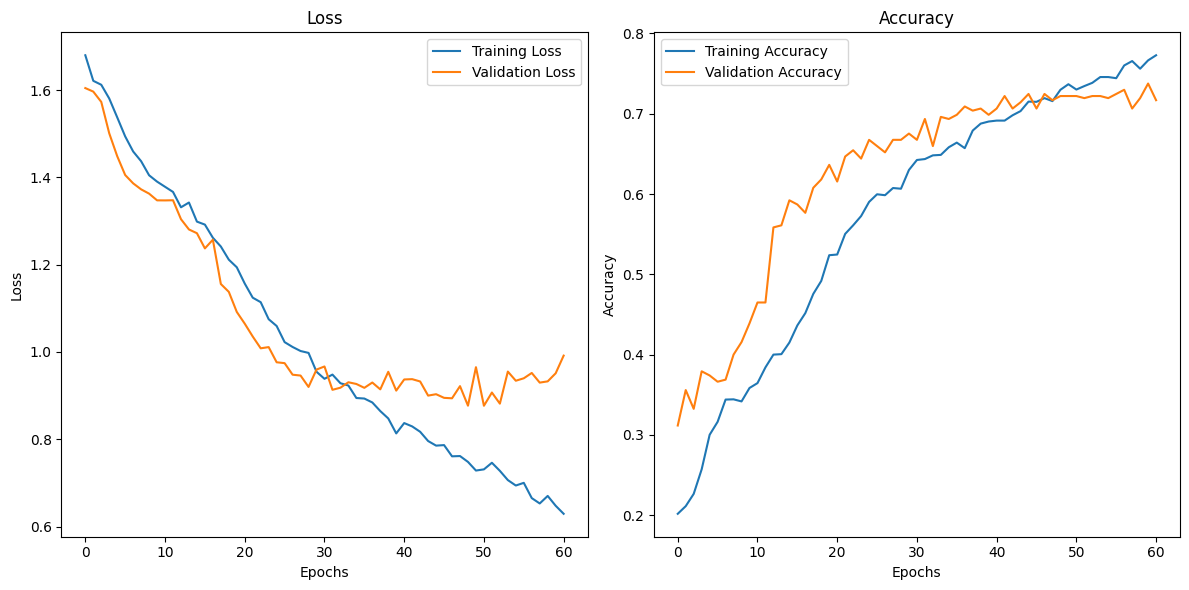

In [438]:
import matplotlib.pyplot as plt

history_dict = history.history 
loss_values = history_dict['loss']
accuracy_values = history_dict['accuracy']  
val_loss_values = history_dict['val_loss']  
val_accuracy_values = history_dict['val_accuracy'] 

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(loss_values, label='Training Loss')
plt.plot(val_loss_values, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(accuracy_values, label='Training Accuracy')
plt.plot(val_accuracy_values, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


<Figure size 600x500 with 0 Axes>

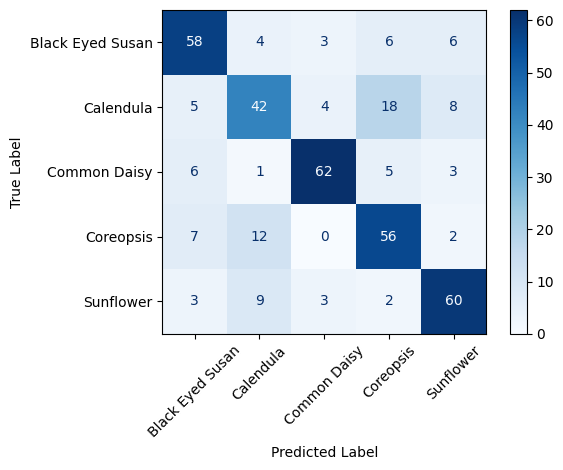

In [439]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = mlp_model.predict(X_test)  
y_pred_classes = np.argmax(y_pred, axis=1) 

cm = confusion_matrix(y_test, y_pred_classes)

class_names = ['Black Eyed Susan', 'Calendula', 'Common Daisy', 'Coreopsis', 'Sunflower']

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

plt.figure(figsize=(6, 5))
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

In [440]:
from sklearn.metrics import classification_report
import numpy as np

y_pred = mlp_model.predict(X_test)  
y_pred_classes = np.argmax(y_pred, axis=1) 

report = classification_report(y_test, y_pred_classes)

print("Classification Report:")
print(report)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.75      0.74        77
           1       0.62      0.55      0.58        77
           2       0.86      0.81      0.83        77
           3       0.64      0.73      0.68        77
           4       0.76      0.78      0.77        77

    accuracy                           0.72       385
   macro avg       0.72      0.72      0.72       385
weighted avg       0.72      0.72      0.72       385

